# World Happiness Exploration

2022 year is coming to the end.

It's time to summarize how happiness has been distributed among countries in recent years.

## Table of Content

1. [Common Settings and Imports](#common)


2. [Data Preparation](#preparation)

  2.1. [Load Data](#preparation-load)

  2.2. [Process Data](#preparation-process)


3. [Exploratory Data Analysis](#eda)

  3.1. [General Plots](#eda-general)

  3.2. [Explore Regions](#eda-regions)

  3.3. [Data on Map](#eda-map)

  3.4. [2022](#eda-2022)


4. [Conclusion](#conclusions)

<a class="anchor" id="common"></a>

## 1. Common Settings and Imports

In [1]:
from io import BytesIO
import requests

import numpy as np
import pandas as pd
from PIL import Image

from lets_plot import *
from lets_plot.mapping import *
from lets_plot.geo_data import *
from lets_plot.bistro import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [2]:
LetsPlot.setup_html()

In [3]:
PALETTE = "glasbey_hv"
HS_LOW, HS_HIGH = "#d73027", "#1a9850"
NEUTRAL_LIGHT, NEUTRAL_DARK = "#9ecae1", "#084594"
YEARS = list(range(2015, 2023))
YEARS_RANGE = [min(YEARS), max(YEARS)]

In [4]:
def bunch2(p1, p2, width=500, height=500):
    bunch = GGBunch()
    bunch.add_plot(p1, 0, 0, width, height)
    bunch.add_plot(p2, width, 0, width, height)
    return bunch.show()

In [5]:
def get_image(filename):
    path = "https://raw.githubusercontent.com/HIL-HK/lets-plot-examples/master/data/images/{0}".format(filename)
    return Image.open(BytesIO(requests.get(path).content))

<a class="anchor" id="preparation"></a>

## 2. Data Preparation

<a class="anchor" id="preparation-load"></a>

### 2.1. Load Data

In [6]:
def get_data(path):
    def read_csv(year):
        return pd.read_csv("{0}/{1}.csv".format(path, year)).assign(year=year)

    return pd.concat([
        read_csv(year) for year in YEARS
    ], ignore_index=True)

In [7]:
raw_df = get_data("https://raw.githubusercontent.com/HIL-HK/lets-plot-examples/master/data/world_happiness_report")
print(raw_df.shape)
raw_df.head()

(1231, 52)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a class="anchor" id="preparation-process"></a>

### 2.2. Process Data

In [8]:
raw_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Perceptions of corruption,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Dystopia + residual,RANK
count,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,...,613.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,147.000000
mean,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,...,0.416267,5.502645,0.056111,5.612629,5.392641,9.363053,2.198127,0.922248,2.198290,74.000000
std,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,...,0.340490,1.092111,0.020292,1.074850,1.110534,1.180595,0.229201,0.391830,0.595958,42.579338
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,...,0.000000,2.523000,0.025902,2.596000,2.449000,6.492642,1.972317,0.000000,0.257241,1.000000
25%,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,...,0.082000,4.769400,0.042000,4.885588,4.636008,8.483295,1.972317,0.633963,1.823000,37.500000
50%,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,...,0.306000,5.524500,0.052321,5.610132,5.426829,9.514612,1.972317,0.982509,2.223108,74.000000
75%,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,...,0.780623,6.248375,0.066000,6.362124,6.136381,10.356000,2.430000,1.241988,2.619750,110.500000
max,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,...,0.939000,7.842000,0.173000,7.904000,7.780000,11.647000,2.430000,1.751000,3.482000,147.000000


Many columns are only partially filled. Let's fix this for the `"Country"` column.

In [9]:
fixed_df = raw_df.copy()

fixed_df["Country"] = fixed_df["Country"].fillna(fixed_df["Country or region"]).fillna(fixed_df["Country name"])
fixed_df.drop(columns=["Country or region", "Country name"], inplace=True)
fixed_df = fixed_df[fixed_df["Country"] != "xx"]
fixed_df = fixed_df[~fixed_df["Country"].str.contains("\*").astype(bool)]
country_vc = fixed_df["Country"].value_counts()
fixed_df = fixed_df[fixed_df["Country"].isin(country_vc[country_vc == country_vc.max()].index)]

print(fixed_df.shape)
fixed_df.head()

(936, 50)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
nonnan_cols = {
    year: set(fixed_df[fixed_df.year == year].dropna(axis=1).columns)
    for year in fixed_df.year.unique()
}
set.intersection(*nonnan_cols.values())

{'Country', 'year'}

There are still not many completely filled columns.

In [11]:
print(
    "\n\n".join([
        "Non-nan columns in {0}: {1}".format(year, ", ".join(['"{0}"'.format(col) for col in cols]))
        for year, cols in nonnan_cols.items()
    ])
)

Non-nan columns in 2015: "Trust (Government Corruption)", "Dystopia Residual", "Freedom", "Standard Error", "Family", "Happiness Score", "Generosity", "Health (Life Expectancy)", "Country", "Economy (GDP per Capita)", "Region", "Happiness Rank", "year"

Non-nan columns in 2016: "Trust (Government Corruption)", "Dystopia Residual", "Freedom", "Family", "Upper Confidence Interval", "Happiness Score", "Generosity", "Health (Life Expectancy)", "Country", "Economy (GDP per Capita)", "Region", "Lower Confidence Interval", "Happiness Rank", "year"

Non-nan columns in 2017: "Freedom", "Health..Life.Expectancy.", "Trust..Government.Corruption.", "Family", "Generosity", "Happiness.Rank", "Happiness.Score", "Whisker.high", "year", "Economy..GDP.per.Capita.", "Dystopia.Residual", "Country", "Whisker.low"

Non-nan columns in 2018: "GDP per capita", "Score", "Healthy life expectancy", "Generosity", "Overall rank", "Freedom to make life choices", "year", "Social support", "Country"

Non-nan columns i

It looks like the same data is spread across different columns. We will fix it.

In [12]:
# Copy the raw data
df = fixed_df.copy()
# Fix country column name
df.rename(columns={"Country": "country"}, inplace=True)
# Region column
df["region"] = df["country"].replace(df[["country", "Region"]].set_index("country").dropna().to_dict()["Region"])
# Happiness score column
df["happiness_score"] = df["Happiness Score"].fillna(df["Happiness.Score"])\
                                             .fillna(df["Score"])\
                                             .fillna(df["Ladder score"])\
                                             .fillna(df["Happiness score"])\
                                             .astype(str).str.replace(",", ".").astype(float)
# Happiness rank column
df.sort_values(by=["year", "happiness_score"], ascending=[True, False], inplace=True)
df["happiness_rank"] = df.groupby("year").cumcount() + 1
# Drop extra columns
df = df[["year", "country", "region", "happiness_rank", "happiness_score"]]
# Sort values
df = df.sort_values(by=["year", "happiness_rank"]).reset_index(drop=True)
# Print the result
print(df.shape)
df.head()

(936, 5)


,year,country,region,happiness_rank,happiness_score
0,2015,Switzerland,Western Europe,1,7.587
1,2015,Iceland,Western Europe,2,7.561
2,2015,Denmark,Western Europe,3,7.527
3,2015,Norway,Western Europe,4,7.522
4,2015,Canada,North America,5,7.427


<a class="anchor" id="eda"></a>

## 3. Exploratory Data Analysis

<a class="anchor" id="eda-general"></a>

### 3.1. General Plots

In [13]:
top_n = 7

top_df = df[df.happiness_rank <= top_n]

print(top_df.shape)
top_df.head()

(56, 5)


,year,country,region,happiness_rank,happiness_score
0,2015,Switzerland,Western Europe,1,7.587
1,2015,Iceland,Western Europe,2,7.561
2,2015,Denmark,Western Europe,3,7.527
3,2015,Norway,Western Europe,4,7.522
4,2015,Canada,North America,5,7.427


In [14]:
bottom_n = 7

bottom_df = df.sort_values(by=["happiness_rank", "year"]).iloc[-len(YEARS)*bottom_n:].sort_values(by=["year", "happiness_rank"])

print(bottom_df.shape)
bottom_df.head()

(56, 5)


,year,country,region,happiness_rank,happiness_score
110,2015,Tanzania,Sub-Saharan Africa,111,3.781
111,2015,Guinea,Sub-Saharan Africa,112,3.656
112,2015,Ivory Coast,Sub-Saharan Africa,113,3.655
113,2015,Burkina Faso,Sub-Saharan Africa,114,3.587
114,2015,Afghanistan,Southern Asia,115,3.575


In [15]:
rank_df = df[["year", "country", "happiness_rank"]].pivot(index="country", columns="year", values="happiness_rank")[YEARS_RANGE]
rank_df.columns = YEARS_RANGE
rank_df["difference"] = rank_df[YEARS_RANGE[1]] - rank_df[YEARS_RANGE[0]]
rank_df["trend"] = np.where(rank_df.difference == 0, "stability", np.where(rank_df.difference > 0, "regress", "progress"))
rank_df.sort_values(by="difference", ascending=False, inplace=True)
rank_df.reset_index(inplace=True)

print(rank_df.shape)
rank_df.head()

(117, 5)


,country,2015,2022,difference,trend
0,Venezuela,21,90,69,regress
1,Zambia,69,111,42,regress
2,Jordan,66,108,42,regress
3,Pakistan,65,102,37,regress
4,Lebanon,81,116,35,regress


In [16]:
ggplot(df, aes("year", "happiness_score")) + \
    geom_violin(color=NEUTRAL_DARK, fill=NEUTRAL_LIGHT) + \
    geom_boxplot(color=NEUTRAL_DARK, width=.2) + \
    scale_x_continuous(breaks=YEARS) + \
    ylab("happiness score") + \
    ggtitle("Happiness score density through the years") + \
    ggsize(800, 400) + \
    theme_minimal() + theme(axis_tooltip_x='blank')

Over time, the median happiness score slowly increases. The distribution of happiness score is also concentrated at its upper values.

In [17]:
p1 = ggplot(top_df, aes("year", "happiness_rank", color="country")) + \
    geom_line(size=1) + \
    geom_point(size=4) + \
    scale_x_continuous(breaks=YEARS) + \
    scale_y_continuous(name="happiness rank", trans="reverse", \
                       breaks=top_df.happiness_rank.unique()) + \
    scale_color_discrete(guide=guide_legend(ncol=3), breaks=top_df.country.unique()) + \
    ggtitle("Top {0} countries by happiness rank".format(top_n)) + \
    theme_minimal() + theme(axis_tooltip='blank', legend_position='bottom')
p2 = ggplot(top_df) + \
    geom_pie(aes(fill=as_discrete("country", order_by='..count..')), \
             hole=.25, stroke=1, show_legend=False, \
             tooltips=layer_tooltips().title("@country")\
                     .format("@..count..", "d").line("count|@..count..")) + \
    facet_wrap(facets="happiness_rank") + \
    scale_fill_discrete(breaks=top_df.country.unique()) + \
    ggtitle("Proportion of countries for each place of happiness rank".format(top_n)) + \
    theme_classic() + theme(axis='blank')

bunch2(p1, p2)

Among the happiest countries, Norway has the worst trend and Finland has the best.
The first place is most often occupied by Finland, the second by Denmark, and the third by Iceland.
The top seems to be dominated by Scandinavian countries.

In [18]:
p1 = ggplot(bottom_df, aes("year", "happiness_rank", color="country")) + \
    geom_line(size=1) + \
    geom_point(size=4) + \
    scale_x_continuous(breaks=YEARS) + \
    scale_y_continuous(name="happiness rank", trans="reverse", \
                       breaks=bottom_df.happiness_rank.unique()) + \
    scale_color_discrete(guide=guide_legend(ncol=3), breaks=bottom_df.country.unique()) + \
    ggtitle("Bottom {0} countries by happiness rank".format(bottom_n)) + \
    theme_minimal() + theme(axis_tooltip='blank', legend_position='bottom')
p2 = ggplot(bottom_df) + \
    geom_pie(aes(fill=as_discrete("country", order_by='..count..')), \
             hole=.25, stroke=1, show_legend=False, \
             tooltips=layer_tooltips().title("@country")\
                     .format("@..count..", "d").line("count|@..count..")) + \
    facet_wrap(facets="happiness_rank") + \
    scale_fill_discrete(breaks=bottom_df.country.unique()) + \
    ggtitle("Proportion of countries for each place of happiness rank".format(bottom_n)) + \
    theme_classic() + theme(axis='blank')

bunch2(p1, p2)

Among the least happy countries there is no such constancy. Except Tanzania and Afghanistan.

Also, Afghanistan more often than others is at the last place.

In [19]:
ggplot(pd.concat([rank_df.head(top_n), rank_df.tail(bottom_n)])) + \
    geom_segment(aes(y=str(YEARS_RANGE[0]), yend=str(YEARS_RANGE[1]), color=as_discrete("trend")), \
                 x=YEARS_RANGE[0], xend=YEARS_RANGE[1], arrow=arrow()) + \
    geom_point(aes(y=str(YEARS_RANGE[0]), color=as_discrete("trend")), x=YEARS_RANGE[0], \
               tooltips=layer_tooltips().title("@country")\
                   .line("@trend from @{0} to @{1}".format(*YEARS_RANGE))) + \
    geom_point(aes(y=str(YEARS_RANGE[1]), color=as_discrete("trend")), x=YEARS_RANGE[1], \
               tooltips=layer_tooltips().title("@country")\
                   .line("@trend from @{0} to @{1}".format(*YEARS_RANGE))) + \
    geom_text(aes(y=str(YEARS_RANGE[1]), color=as_discrete("trend"), label="country"), \
              x=YEARS_RANGE[1], hjust=0, position=position_nudge(x=.1), size=6) + \
    scale_x_continuous(name="years", breaks=YEARS_RANGE) + \
    scale_y_continuous(name="happiness rank", trans="reverse") + \
    scale_color_manual(values=[HS_LOW, HS_HIGH]) + \
    xlim(2015, 2024) + \
    ggtitle("Extreme {0} countries by happiness rank change".format(top_n + bottom_n)) + \
    ggsize(600, 1200) + \
    theme_minimal() + theme(legend_position='none')

This plot shows which countries have experienced the largest change in happiness rank over past 8 years.

The best trend can be seen in Romania and the worst one in Venezuela.

<a class="anchor" id="eda-regions"></a>

### 3.2. Explore Regions

In [20]:
ggplot(df) + \
    geom_boxplot(aes(as_discrete("region", order_by="..middle.."), "happiness_score"), \
                 color=NEUTRAL_DARK, fill=NEUTRAL_LIGHT) + \
    ylab("happiness score") + \
    ggtitle("Happiness score main aggregation values by region") + \
    ggsize(600, 600) + \
    theme_minimal()

Despite the fact that the maximum values of happiness are achieved in Western Europe, on average the Australian region is happier.

In [21]:
regions_df = df.groupby("region").agg({"country": "count", "happiness_score": ["mean", "std"]})
regions_df = regions_df.droplevel(0, axis=1).reset_index()
regions_df["count"] = (regions_df["count"] / len(YEARS)).astype(int)
regions_df["explode"] = np.where(regions_df["mean"] < 5, 1/3, 0)
regions_df.sort_values(by="count", ascending=False, inplace=True)

print(regions_df.shape)
regions_df.head()

(10, 5)


,region,count,mean,std,explode
1,Central and Eastern Europe,24,5.538956,0.589009,0.000000
8,Sub-Saharan Africa,21,4.414707,0.633909,0.333333
9,Western Europe,19,6.846412,0.701921,0.000000
3,Latin America and Caribbean,18,6.065798,0.533900,0.000000
4,Middle East and Northern Africa,13,5.407890,0.938793,0.000000


In [22]:
ggplot(regions_df) + \
    geom_pie(aes(slice="count", fill="mean", explode="explode"), stat='identity', \
             stroke=1, size=40, \
             labels=layer_labels(["mean"]).format("@mean", ".3f"), \
             tooltips=layer_tooltips().title("@region")\
                                      .line("countries count|@count")\
                                      .format("@mean", ".3f").line("happiness score mean|@mean")\
                                      .format("@std", ".3f").line("happiness score std|@std")) + \
    scale_fill_gradient(name="mean happiness score", low=HS_LOW, high=HS_HIGH) + \
    ggtitle("Happiness score by region with countries counts") + \
    ggsize(800, 600) + \
    theme_classic() + theme(axis='blank')

<a class="anchor" id="eda-map"></a>

### 3.3. Data on Map

In [23]:
def map_plot(data, year):
    local_df = data[data.year == year]
    countries = geocode_countries(data.country.unique()).inc_res().get_boundaries()
    return ggplot() + \
        geom_livemap(zoom=1) + \
        geom_map(aes(fill="happiness_score"), data=local_df, map=countries, map_join="country", \
                 size=0, alpha=.5, tooltips=layer_tooltips().title("@country")\
                                                            .line("happiness_score|^fill")) + \
        scale_fill_gradient(name="happiness score", low=HS_LOW, high=HS_HIGH, \
                            limits=[data.happiness_score.min(), data.happiness_score.max()]) + \
        ggtitle("Happiness score for each country in {0}".format(year)) + \
        theme(legend_position='bottom')

width, height = 500, 500
bunch = GGBunch()
bunch.add_plot(map_plot(df, YEARS_RANGE[0]), 0, 0, width, height)
bunch.add_plot(map_plot(df, YEARS_RANGE[1]), width, 0, width, height)
bunch.show()

It's remarkable that around Afghanistan there is no other such unhappy countries.

<a class="anchor" id="eda-2022"></a>

### 3.4. 2022

Let's take a closer look at 2022.

Here we will use more columns from the original dataset, which can affect the happiness score.

In [24]:
df_2022 = fixed_df[fixed_df.year == 2022][[
    "Country", "Happiness score", "Explained by: Healthy life expectancy",
    "Explained by: Perceptions of corruption", "Explained by: Social support", "Explained by: Generosity"
]].sort_values(by="Happiness score", ascending=False).reset_index(drop=True)
df_2022.columns = ["country", "happiness_score", "healthy_life_expectancy", \
                   "perceptions_of_corruption", "social_support", "generosity"]
for col in set(df_2022.columns) - set(["country"]):
    df_2022[col] = df_2022[col].astype(str).str.replace(",", ".").astype(float)
print(df_2022.shape)
df_2022.head()

(117, 6)


,country,happiness_score,healthy_life_expectancy,perceptions_of_corruption,social_support,generosity
0,Finland,7.821,0.775,0.534,1.258,0.109
1,Denmark,7.636,0.777,0.532,1.243,0.188
2,Iceland,7.557,0.803,0.191,1.320,0.270
3,Switzerland,7.512,0.822,0.461,1.226,0.147
4,Netherlands,7.415,0.787,0.419,1.206,0.271


In [25]:
corr_plot(df_2022.corr(numeric_only=True))\
    .tiles(type='full').labels(type='full', color="black")\
    .palette_gradient(low="#d53e4f", mid="#ffffbf", high="#3288bd")\
    .build() + \
    ggtitle("Correlations between numeric values") + \
    ggsize(800, 600)

Social support is the most important thing that affects the happiness score, while generosity has almost no effect.

In [26]:
id_vars = ["country", "happiness_score"]
ggplot(pd.melt(df_2022, id_vars=id_vars, value_vars=set(df_2022.columns) - set(id_vars)), \
       aes("happiness_score", "value", color="variable", fill="variable")) + \
    geom_point() + \
    geom_smooth(method='loess') + \
    facet_wrap(facets="variable") + \
    scale_color_brewer(name="social parameter", type='qual', palette="Set1") + \
    scale_fill_brewer(name="social parameter", type='qual', palette="Set1") + \
    xlab("happiness score") + ylab("social parameter value") + \
    ggtitle("Non-linear dependency between happiness score and different social parameters") + \
    theme_minimal()

Happiness score is more or less non-linearly related with each of the social parameters considered.

<a class="anchor" id="conclusions"></a>

## 4. Conclusion

During the years happiness slightly increases and concentrates in the west world countries.

The most noticeable positive changes are observed in the Balkans.

The situation with happiness is negative in South Asia, especially in Afghanistan.

Let's hope that in the future there will be more happiness in the world.


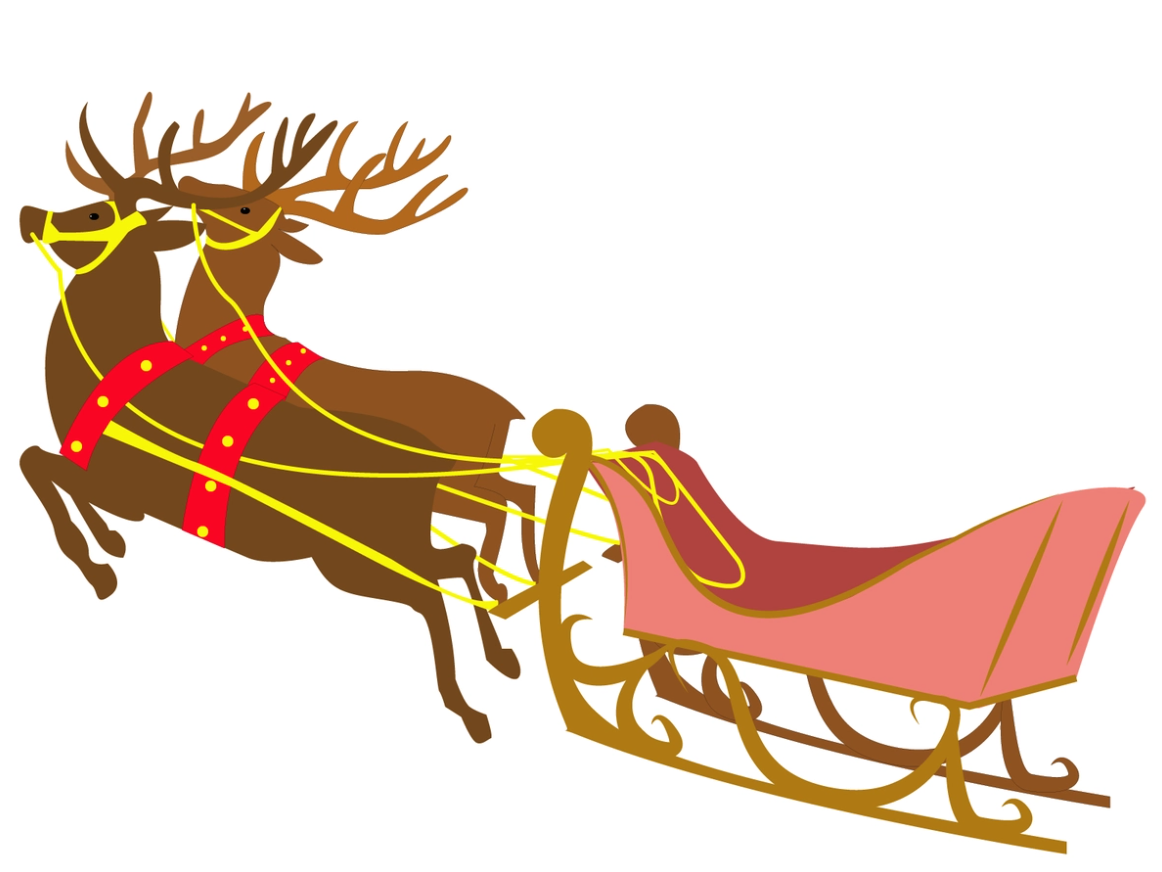
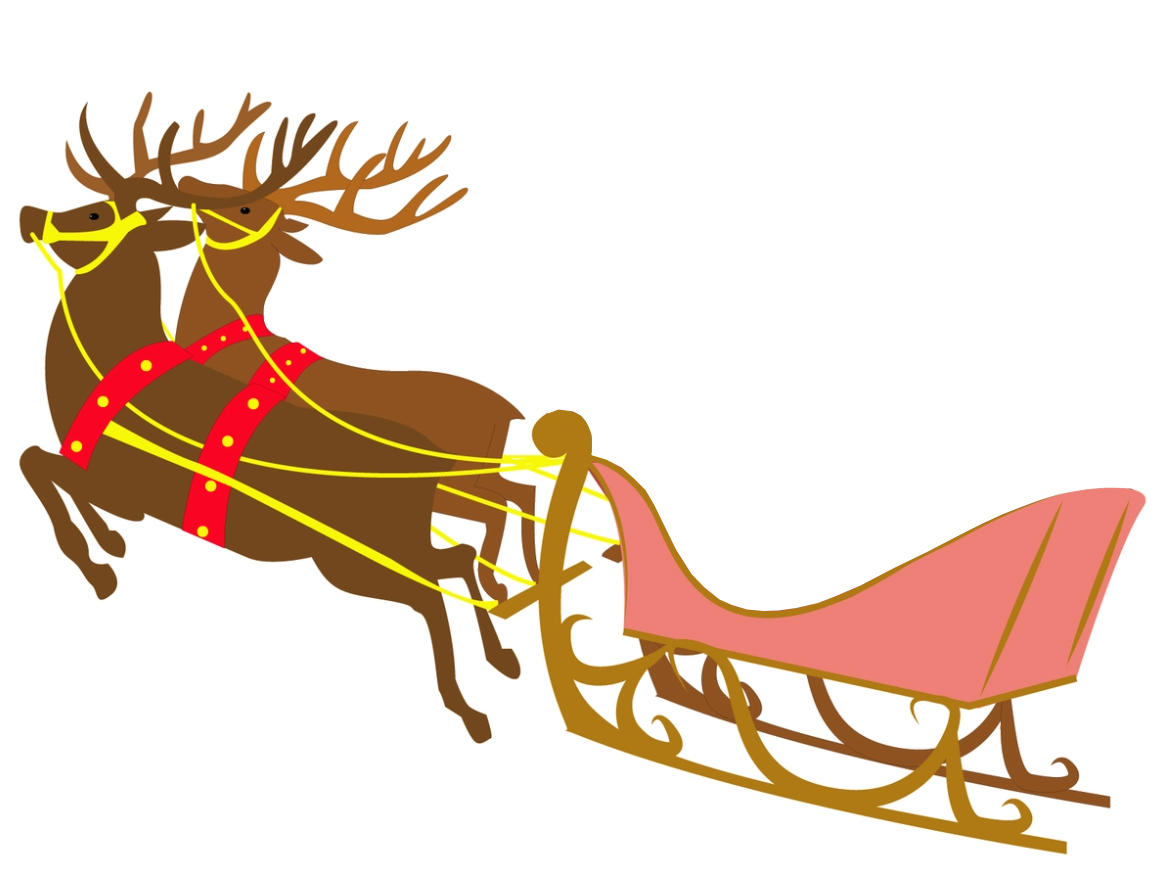

In [27]:
ggplot(df[df.happiness_score >= df.happiness_score.median()]) + \
    geom_imshow(np.asarray(get_image("christmas_sleigh.png"))) + \
    geom_pie(aes(fill=as_discrete("year", order_by="..count..", order=1)), \
             x=830, y=380, size=18, show_legend=False, \
             tooltips=layer_tooltips().title("@year").format("@..count..", "d")\
                 .line("number of countries with happiness score >= median: @..count..")) + \
    geom_imshow(np.asarray(get_image("christmas_sleigh_front.png"))) + \
    geom_text(x=400, y=-50, label="Happy New Year!", \
              family="Times New Roman", fontface='bold italic', \
              size=20, color="#006d2c") + \
    scale_fill_manual(values=[HS_LOW, HS_HIGH] * len(YEARS)) + \
    ggsize(800, 600) + \
    theme_classic() + theme(axis='blank')